In [31]:
# importing the python machine learning stack

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
%%time

# importing the dataset

adult = pd.read_csv("adult.csv")
adult.head(9)#.transpose()

Wall time: 90.8 ms


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K


In [33]:
# shape of the dataset

adult.shape

(32561, 15)

In [34]:
# info
adult.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
# checking for missing values
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Its showing that there is no missing values in the data.
Let's make the values with '?' as 'nan' and recheck the data for missing values.

In [36]:
# data profiling

import pandas_profiling as pp

profile = pp.ProfileReport(adult)
profile

In [37]:
# there are many fields with '?'. So we're encoding and rechecking the info about the data
adult[adult=='?'] = np.nan
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Now we can see that some of the attributes have missing values

In [39]:
# imputing the missing values with the most frequent element in that attribute
adult = adult.apply(lambda x: x.fillna(x.value_counts().index[0]))
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [40]:
# assigning the categories of y as 0 and 1 for income 'less than or equal to 50K' and 'more than 50K' respectively.

adult['income'][adult['income'] == '<=50K'] = 0
adult['income'][adult['income'] == '>50K'] = 1

In [41]:
import seaborn as sns

The maximum age is 90
The minimum age is 17


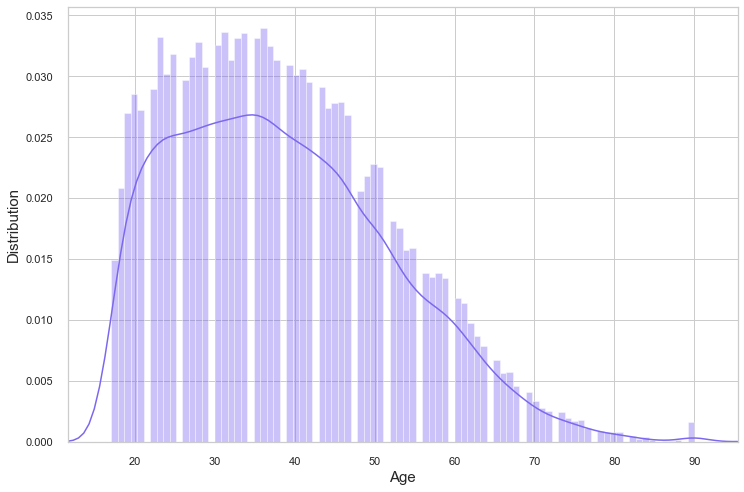

In [42]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(adult['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", adult['age'].max())
print ("The minimum age is", adult['age'].min())

In [43]:
# splitting independent and dependent variable
X = adult.drop(['income'], axis=1)
y = adult['income']

print("Shape of X is ", X.shape)
print("Shape of y is ", y.shape)


Shape of X is  (32561, 14)
Shape of y is  (32561,)


We have 9 categorical variables in the data which need to be encoded in order to make machine learning models in it.

In [44]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [45]:
# one hot encoding of the categorical data
# dropping the first column of each category after one hot encoding in order to deal with Curse of Dimensionality

X = pd.get_dummies(X, drop_first=True)
X.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,74,88638,16,0,3683,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,68,422013,9,0,3683,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,41,70037,10,0,3004,60,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


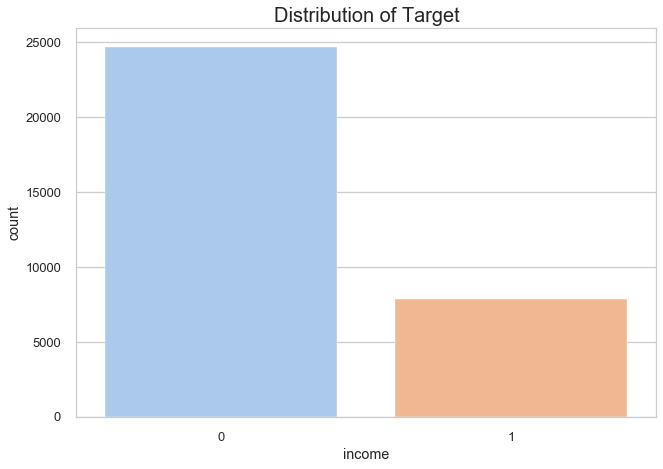

In [46]:
# plotting the target attribute
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(adult['income'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()

In [47]:
# train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

print("Shape of X_Train", X_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (24420, 97)
Shape of X_Test (8141, 97)
Shape of y_Train (24420,)
Shape of y_Test (8141,)


## Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [50]:
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,1.202649,0.170276,-2.761546,-0.145098,-0.218566,-0.03923,-0.262748,-0.015677,0.576909,-0.187692,...,-0.031365,-0.059449,-0.02024,-0.050452,-0.037885,-0.025605,-0.024792,-3.247476,-0.044379,-0.023079
1,0.250217,-0.137093,-0.426081,-0.145098,-0.218566,-0.03923,-0.262748,-0.015677,0.576909,-0.187692,...,-0.031365,-0.059449,-0.02024,-0.050452,-0.037885,-0.025605,-0.024792,0.307931,-0.044379,-0.023079
2,0.250217,-0.497842,-0.426081,-0.145098,-0.218566,-0.03923,-0.262748,-0.015677,0.576909,-0.187692,...,-0.031365,-0.059449,-0.02024,-0.050452,-0.037885,-0.025605,-0.024792,0.307931,-0.044379,-0.023079
3,-0.995271,0.365038,-0.036836,-0.145098,-0.218566,-0.03923,-0.262748,-0.015677,0.576909,-0.187692,...,-0.031365,-0.059449,-0.02024,-0.050452,-0.037885,-0.025605,-0.024792,-3.247476,-0.044379,-0.023079
4,1.568969,-0.786736,-1.593813,-0.145098,-0.218566,-0.03923,-0.262748,-0.015677,0.576909,-0.187692,...,-0.031365,-0.059449,-0.02024,-0.050452,-0.037885,-0.025605,-0.024792,0.307931,-0.044379,-0.023079


In [51]:
#X_train.columns

In [52]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Modeling

### 1. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
 #Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
model1 = classifier.fit(X_train, y_train)

# predicting for the test data
y_pred1 = model1.predict(X_test)

In [55]:
# evaluating the model
print("Training Accuracy :", model1.score(X_train, y_train))
print("Testing Accuracy :", model1.score(X_test, y_test))

Training Accuracy : 0.8531122031122031
Testing Accuracy : 0.8449821889202801


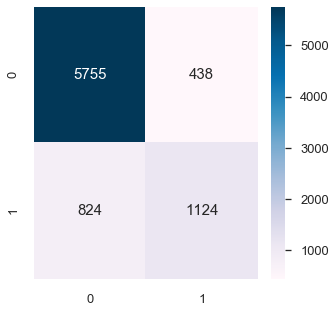

In [56]:
# cofusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm1, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt="d")


In [57]:
# classification report
cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6193
           1       0.72      0.58      0.64      1948

    accuracy                           0.84      8141
   macro avg       0.80      0.75      0.77      8141
weighted avg       0.84      0.84      0.84      8141



### 10 Folds cross-validation for logistic regression

In [58]:
# KFolds and Cross_val_scores
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import ShuffleSplit

kfold = ShuffleSplit(n_splits=10, random_state=0)
model = LogisticRegression()
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Cross-val-score is ", results.mean()*100.0)

Cross-val-score is  84.77067977067978


In [59]:
# Cross-validation AUC for Logistic Regression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC value is ", results.mean())

AUC value is  0.9058232097049501


## 2. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model2 = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model2.fit(X_train, y_train)

y_predict = model2.predict(X_test)
y_pred_quant = model2.predict_proba(X_test)[:, 1]
y_pred2 = model2.predict(X_test)

In [61]:
# evaluating the model
print("Training Accuracy :", model2.score(X_train, y_train))
print("Testing Accuracy :", model2.score(X_test, y_test))

Training Accuracy : 0.834930384930385
Testing Accuracy : 0.834541211153421


              precision    recall  f1-score   support

           0       0.83      0.98      0.90      6193
           1       0.88      0.36      0.51      1948

    accuracy                           0.83      8141
   macro avg       0.86      0.67      0.70      8141
weighted avg       0.84      0.83      0.81      8141



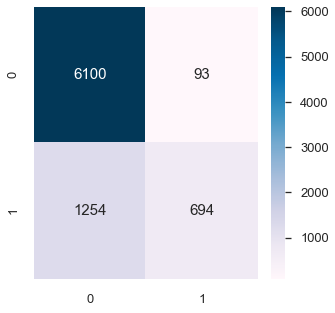

In [62]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, fmt="d", cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred2)
print(cr)

### Cross-validation for random forest

In [63]:
kfold = ShuffleSplit(n_splits=10, random_state=0)
model = RandomForestClassifier()
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Cross-val-score is ", results.mean()*100.0)

Cross-val-score is  85.04914004914005


In [64]:
# Cross-validation AUC for Random Forest

kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier()
scoring = 'roc_auc'
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC value is ", results.mean())

AUC value is  0.9041714692217295


## 3.Decision trees

In [65]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model3.fit(X_train, y_train)

y_predict = model3.predict(X_test)
y_pred_quant = model3.predict_proba(X_test)[:, 1]
y_pred3 = model3.predict(X_test)

In [66]:
# evaluating the model
print("Training Accuracy :", model3.score(X_train, y_train))
print("Testing Accuracy :", model3.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8158702862056258


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6193
           1       0.62      0.61      0.61      1948

    accuracy                           0.82      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141



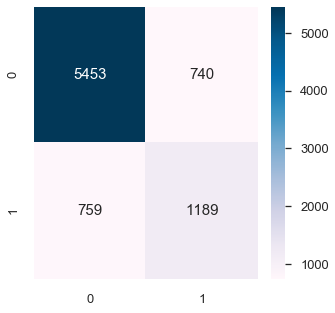

In [67]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred3)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, fmt="d", cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred3)
print(cr)

### Cross validation for decision tree

In [68]:
fold = ShuffleSplit(n_splits=10, random_state=0)
model = DecisionTreeClassifier()
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Cross-val-score is ", results.mean()*100.0)

Cross-val-score is  81.44144144144144


In [69]:
# Cross-validation AUC for Decision Tree

kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
scoring = 'roc_auc'
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC value is ", results.mean())

AUC value is  0.7513402041167567


## 4. Naive Bayes Model

In [70]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train, y_train)

y_predict = model4.predict(X_test)
y_pred_quant = model4.predict_proba(X_test)[:, 1]
y_pred4 = model4.predict(X_test)

In [71]:
# evaluating the model
print("Training Accuracy :", model4.score(X_train, y_train))
print("Testing Accuracy :", model4.score(X_test, y_test))

Training Accuracy : 0.4582309582309582
Testing Accuracy : 0.45522663063505714


              precision    recall  f1-score   support

           0       0.97      0.29      0.45      6193
           1       0.30      0.97      0.46      1948

    accuracy                           0.46      8141
   macro avg       0.64      0.63      0.46      8141
weighted avg       0.81      0.46      0.45      8141



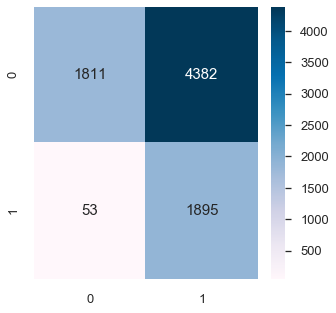

In [72]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred4)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, fmt="d", cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred4)
print(cr)

### Cross-validation for Naive Bayes

In [73]:
fold = ShuffleSplit(n_splits=10, random_state=0)
model = GaussianNB()
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Cross-val-score is ", results.mean()*100.0)

Cross-val-score is  44.23423423423423


In [74]:
# Cross-validation AUC for Naive Bayes

kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
scoring = 'roc_auc'
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC value is ", results.mean())

AUC value is  0.6804948338803081


## 5. Support Vector Machine

In [75]:
%%time

from sklearn.svm import SVC
model5 = SVC(kernel = 'linear', random_state = 0)
model5.fit(X_train, y_train)

y_predict = model5.predict(X_test)
y_pred5 = model5.predict(X_test)

Wall time: 1min 24s


In [76]:
# evaluating the model
print("Training Accuracy :", model5.score(X_train, y_train))
print("Testing Accuracy :", model5.score(X_test, y_test))

Training Accuracy : 0.8497133497133497
Testing Accuracy : 0.8454735290504852


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6193
           1       0.74      0.55      0.63      1948

    accuracy                           0.85      8141
   macro avg       0.80      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



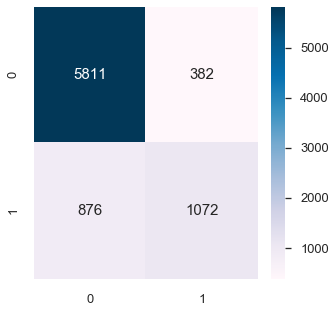

In [77]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred5)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, fmt="d", cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred5)
print(cr)

### 10 folds cross-validation for SVM

In [78]:
fold = ShuffleSplit(n_splits=10, random_state=0)
model = SVC()
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Cross-val-score is ", results.mean()*100.0)

Cross-val-score is  84.58230958230958


In [79]:
# Cross-validation AUC for Naive Bayes

kfold = KFold(n_splits=10, random_state=7)
model = SVC()
scoring = 'roc_auc'
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC value is ", results.mean())

AUC value is  0.8939631838947836


## 6. Kernel SVM

In [80]:
%%time

from sklearn.svm import SVC
model6 = SVC(kernel = 'rbf', random_state = 0)
model6.fit(X_train, y_train)

y_predict = model6.predict(X_test)
y_pred6 = model6.predict(X_test)

Wall time: 1min 7s


In [81]:
# evaluating the model
print("Training Accuracy :", model6.score(X_train, y_train))
print("Testing Accuracy :", model6.score(X_test, y_test))

Training Accuracy : 0.8611793611793612
Testing Accuracy : 0.8476845596364083


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6193
           1       0.75      0.55      0.63      1948

    accuracy                           0.85      8141
   macro avg       0.81      0.75      0.77      8141
weighted avg       0.84      0.85      0.84      8141



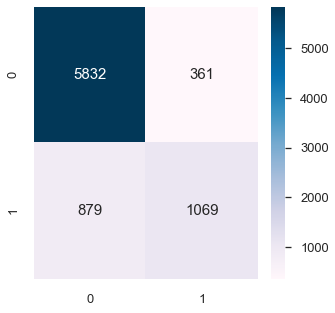

In [82]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred6)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, fmt="d", cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred6)
print(cr)

## XGBOOST

In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model7 = XGBClassifier()
model7.fit(X_train, y_train)

y_predict = model7.predict(X_test)
y_pred7 = model7.predict(X_test)

In [84]:
# evaluating the model
print("Training Accuracy :", model7.score(X_train, y_train))
print("Testing Accuracy :", model7.score(X_test, y_test))

Training Accuracy : 0.8681818181818182
Testing Accuracy : 0.8607050730868444


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6193
           1       0.79      0.57      0.66      1948

    accuracy                           0.86      8141
   macro avg       0.83      0.76      0.79      8141
weighted avg       0.85      0.86      0.85      8141



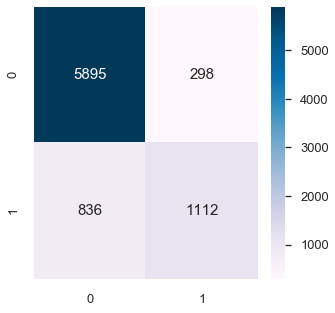

In [85]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred7)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, fmt="d", cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred7)
print(cr)

## PCA

In [86]:
%%time
# importing the dataset

adult = pd.read_csv("adult.csv")

Wall time: 68.8 ms


In [87]:
adult[adult=='?'] = np.nan
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [88]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [89]:
adult['income'][adult['income'] == '<=50K'] = 0
adult['income'][adult['income'] == '>50K'] = 1

In [90]:
adult = adult.apply(lambda x: x.fillna(x.value_counts().index[0]))
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [91]:
# splitting independent and dependent variable
X = adult.drop(['income'], axis=1)
y = adult['income']

print("Shape of X is ", X.shape)
print("Shape of y is ", y.shape)

Shape of X is  (32561, 14)
Shape of y is  (32561,)


In [92]:
# train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

print("Shape of X_Train", X_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (24420, 14)
Shape of X_Test (8141, 14)
Shape of y_Train (24420,)
Shape of y_Test (8141,)


In [93]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [95]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [96]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [97]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.202649,-0.087019,0.170276,-1.626482,-2.761546,-0.405597,-0.028506,-0.898741,0.393899,0.698199,-0.145098,-0.218566,-0.03923,-1.882023
1,0.250217,-0.087019,-0.137093,0.183026,-0.426081,-0.405597,-0.028506,-0.898741,0.393899,0.698199,-0.145098,-0.218566,-0.03923,0.262056
2,0.250217,-0.087019,-0.497842,0.183026,-0.426081,-0.405597,0.727333,-0.898741,0.393899,0.698199,-0.145098,-0.218566,-0.03923,0.262056
3,-0.995271,-0.087019,0.365038,1.217030,-0.036836,0.926124,-1.036292,0.347306,-3.125678,-1.432255,-0.145098,-0.218566,-0.03923,-6.005253
4,1.568969,-0.087019,-0.786736,-2.660486,-1.593813,-1.737317,-0.028506,-0.275717,0.393899,-1.432255,-0.145098,-0.218566,-0.03923,0.262056


In [98]:
# Logistic reg using all the variables
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8227


In [99]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14787211, 0.10164799, 0.08140256, 0.07881498, 0.07458023,
       0.0728962 , 0.07009159, 0.0675686 , 0.06470317, 0.06135329,
       0.06075788, 0.04833067, 0.04264044, 0.02734028])

We can see that approximately 97.25% of variance is explained by the first 13 variables.

Only 2.75% of variance is explained by the last variable. So, we can assume that it carries little information.

So, I will drop it, train the model again and calculate the accuracy.

In [100]:
# using the first 13 variables
X = adult.drop(['income','native.country'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8213


In [101]:
#using the first 12 var
X = adult.drop(['income','native.country', 'hours.per.week'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 12 features: 0.8227


Now, it can be seen that the accuracy has been increased to 0.8227, if the model is trained with 12 features.

Lastly, I will take the last three features combined. Approximately 11.83% of variance is explained by them.

I will repeat the process, drop these features, train the model again and calculate the accuracy.

## Logistic Regression with first 11 features

In [102]:
X = adult.drop(['income','native.country', 'hours.per.week', 'capital.loss'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 11 features: 0.8186


# to choose the right dimension

In [103]:

X = adult.drop(['income'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


In [104]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model7 = XGBClassifier()
model7.fit(X_train, y_train)

y_predict = model7.predict(X_test)
y_pred7 = model7.predict(X_test)

In [105]:
#using the first 12 var
X = adult.drop(['income','native.country', 'hours.per.week'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model7 = XGBClassifier()
model7.fit(X_train, y_train)

y_predict = model7.predict(X_test)
y_pred7 = model7.predict(X_test)

In [106]:
# evaluating the model
print("Training Accuracy :", model7.score(X_train, y_train))
print("Testing Accuracy :", model7.score(X_test, y_test))

Training Accuracy : 0.8667514917514918
Testing Accuracy : 0.8591462790459617
